In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets

In [100]:
departments = pd.read_csv('departments.csv')
doctors = pd.read_csv('doctors.csv')
services1 = pd.read_csv('services1.csv')
services2 = pd.read_csv('services2.csv')

services = pd.concat([services1,services2],ignore_index=True)
merged_data = pd.merge(departments, doctors,on='department_id')
merged_data = pd.merge(merged_data, services, on='doctor_id')
merged_data

,department_id,department_name,tariff_per_hour,doctor_id,last_name,date,patient_last_name,spent_hours
0,1,Педіатрія,30,101,Іванов,2022-01-01,Сидоренко,2
1,1,Педіатрія,30,101,Іванов,2022-01-03,Іванова,4
2,1,Педіатрія,30,102,Петров,2022-01-02,Петрова,3
3,1,Педіатрія,30,102,Петров,2022-01-01,Іванова,10
4,2,Терапія,25,103,Сидоров,2022-01-03,Іванова,4
5,2,Терапія,25,104,Коваленко,2022-01-01,Коваленко,2
6,3,Хірургія,35,105,Сергієнко,2022-01-02,Сергієнко,3


In [101]:
# (а) таблицю, в якiй для кожного лiкаря пораховано заробленi ним кошти за весь час;

merged_data['total'] = merged_data['tariff_per_hour'] * merged_data['spent_hours']
earnings_by_doctor = merged_data.groupby('last_name')['total'].sum().reset_index()
earnings_by_doctor

,last_name,total
0,Іванов,180
1,Коваленко,50
2,Петров,390
3,Сергієнко,105
4,Сидоров,100


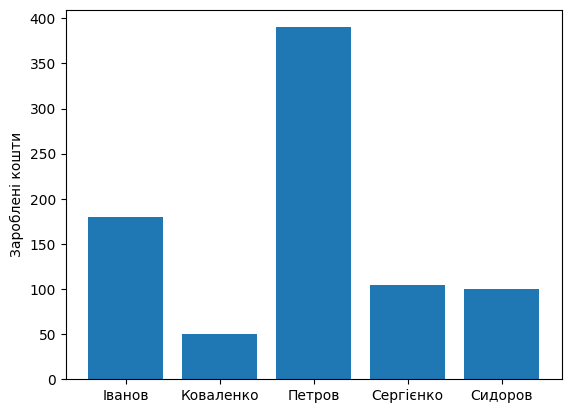

In [102]:
#(б) дiаграму до попереднього пункту;
plt.bar(earnings_by_doctor['last_name'],earnings_by_doctor['total'])
plt.ylabel('Зароблені кошти')
plt.show()


In [103]:
#(в) таблицю, в якiй для кожного вiддiлення пораховано кошти, за- робленi його лiкарями за перiод часу, визначений вiджетами;
start_date_widget = widgets.DatePicker(description='Початкова дата',value =pd.to_datetime(merged_data['date'].min()))
end_date_widget = widgets.DatePicker(description='Кінцева дата',value =pd.to_datetime(merged_data['date'].max()))

display(start_date_widget,end_date_widget)

DatePicker(value=Timestamp('2022-01-01 00:00:00'), description='Початкова дата', step=1)

DatePicker(value=Timestamp('2022-01-03 00:00:00'), description='Кінцева дата', step=1)

In [104]:
merged_data['date'] = pd.to_datetime(merged_data['date'])
chosen_start_date = pd.to_datetime(start_date_widget.value)
chosen_end_date = pd.to_datetime(end_date_widget.value)

selected_date = merged_data[(merged_data['date'] >= chosen_start_date) & (merged_data['date']<= chosen_end_date)]
erned_by_doctor_by_time = selected_date.groupby(['last_name'])['total'].sum().reset_index()
erned_by_doctor_by_time


,last_name,total
0,Іванов,180
1,Коваленко,50
2,Петров,390
3,Сергієнко,105
4,Сидоров,100


In [105]:
#(г) таблицю, в якiй подано кошти, витраченi сумарно пацiєнтом кожного дня, коли вiн вiдвiдував заклад.
earnings_by_patient_day = selected_date.groupby(['patient_last_name','date'])['total'].sum().reset_index()
earnings_by_patient_day

,patient_last_name,date,total
0,Іванова,2022-01-01,300
1,Іванова,2022-01-03,220
2,Коваленко,2022-01-01,50
3,Петрова,2022-01-02,90
4,Сергієнко,2022-01-02,105
5,Сидоренко,2022-01-01,60
